# Predicting Diabetes: A Data-Driven Approach

In [1]:
# imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
original_data = pd.read_csv('./data/diabetes_and_digestive.csv')
original_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
original_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
original_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# check class balance
original_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# apply oversampling to balance the classes
from imblearn.over_sampling import RandomOverSampler
X = original_data.drop('Outcome', axis=1)
y = original_data['Outcome']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
resampled_counts = y_resampled.value_counts()
resampled_counts

Outcome
1    500
0    500
Name: count, dtype: int64

In [7]:
# Categorize BMI values into underweight, normal, overweight, and obese
import pandas as pd

# Function to classify and create one-hot encoded columns based on actual BMI values
def classify_bmi(df, bmi_column):
    # Define BMI thresholds for classification
    underweight_threshold = 18.5
    normal_threshold = 25
    overweight_threshold = 30
    
    # Creating one-hot encoded columns for BMI categories
    df['is_underweight'] = (df[bmi_column] < underweight_threshold).astype(int)
    df['is_normal'] = ((df[bmi_column] >= underweight_threshold) & (df[bmi_column] < normal_threshold)).astype(int)
    df['is_overweight'] = ((df[bmi_column] >= normal_threshold) & (df[bmi_column] < overweight_threshold)).astype(int)
    df['is_obese'] = (df[bmi_column] >= overweight_threshold).astype(int)
    
    return df

# Apply the function to classify BMI
df_resampled = classify_bmi(df_resampled, 'BMI')
df_resampled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,is_underweight,is_normal,is_overweight,is_obese
0,6,148,72,35,0,33.6,0.627,50,1,0,0,0,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,0,1,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,122,64,32,156,35.1,0.692,30,1,0,0,0,1
996,0,131,0,0,0,43.2,0.270,26,1,0,0,0,1
997,8,120,0,0,0,30.0,0.183,38,1,0,0,0,1
998,4,111,72,47,207,37.1,1.390,56,1,0,0,0,1


In [8]:
y = df_resampled['Outcome']
X = df_resampled.drop(columns=['Outcome'])
X_normalized = (X - X.min()) / (X.max() - X.min())
normalized_data = X_normalized.copy()
normalized_data['Outcome'] = y
normalized_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,is_underweight,is_normal,is_overweight,is_obese,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,0.0,0.0,0.0,1.0,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,0.0,1.0,0.0,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.0,1.0,0.0,0.0,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,0.0,1.0,0.0,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.058824,0.613065,0.524590,0.323232,0.184397,0.523100,0.262169,0.150000,0.0,0.0,0.0,1.0,1
996,0.000000,0.658291,0.000000,0.000000,0.000000,0.643815,0.081981,0.083333,0.0,0.0,0.0,1.0,1
997,0.470588,0.603015,0.000000,0.000000,0.000000,0.447094,0.044833,0.283333,0.0,0.0,0.0,1.0,1
998,0.235294,0.557789,0.590164,0.474747,0.244681,0.552906,0.560205,0.583333,0.0,0.0,0.0,1.0,1


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Train test split
X = normalized_data.drop(columns=['Outcome'])
y = normalized_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize the SVM model
svm_model = SVC(kernel='poly', random_state=42, degree=2)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

test_data['Predicted_Outcome'] = y_pred
print(test_data.head())


Accuracy: 0.7750
Confusion Matrix:
[[77 22]
 [23 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.78      0.77      0.78       101

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
521     0.176471  0.623116       0.655738       0.333333  0.153664  0.494784   
737     0.470588  0.326633       0.590164       0.232323  0.000000  0.476900   
740     0.647059  0.603015       0.655738       0.373737  0.177305  0.630402   
660     0.588235  0.814070       0.688525       0.000000  0.000000  0.412817   
411     0.058824  0.562814       0.590164       0.303030  0.208038  0.512668   

     DiabetesPedigreeFunction       Age  is_underweight  is_normal  \
521                  0.096926  0.083333      

## Logistic regression method

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

test_data['Predicted_Outcome'] = y_pred
print(test_data.head())


Accuracy: 0.7350
Confusion Matrix:
[[70 29]
 [24 77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        99
           1       0.73      0.76      0.74       101

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
521     0.176471  0.623116       0.655738       0.333333  0.153664  0.494784   
737     0.470588  0.326633       0.590164       0.232323  0.000000  0.476900   
740     0.647059  0.603015       0.655738       0.373737  0.177305  0.630402   
660     0.588235  0.814070       0.688525       0.000000  0.000000  0.412817   
411     0.058824  0.562814       0.590164       0.303030  0.208038  0.512668   

     DiabetesPedigreeFunction       Age  is_underweight  is_normal  \
521                  0.096926  0.083333      

## Random forest method

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test data for further analysis
test_data['Predicted_Outcome'] = y_pred
print(test_data.head())


Accuracy: 0.8200
Confusion Matrix:
[[74 25]
 [11 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        99
           1       0.78      0.89      0.83       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
521     0.176471  0.623116       0.655738       0.333333  0.153664  0.494784   
737     0.470588  0.326633       0.590164       0.232323  0.000000  0.476900   
740     0.647059  0.603015       0.655738       0.373737  0.177305  0.630402   
660     0.588235  0.814070       0.688525       0.000000  0.000000  0.412817   
411     0.058824  0.562814       0.590164       0.303030  0.208038  0.512668   

     DiabetesPedigreeFunction       Age  is_underweight  is_normal  \
521                  0.096926  0.083333      

### Hyperparameter tuning for Random forest

In [ ]:
import mlflow
import mlflow.sklearn
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools

# Define hyperparameter space for Random Forest
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Create all possible combinations of hyperparameters
param_keys = param_distributions.keys()
param_values = param_distributions.values()
all_combinations = list(itertools.product(*param_values))

# Initialize a DataFrame to log results
results = []

# Iterate over each combination of hyperparameters
for i, combination in enumerate(all_combinations):
    params = dict(zip(param_keys, combination))

    # Initialize the RandomForestClassifier with the current set of parameters
    rf_model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        bootstrap=params['bootstrap'],
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict outcomes for the test set
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a unique run name
    run_name = f"diabetes-rf-run-{int(time.time() * 1000)}"

    # Log metrics and hyperparameters to MLflow for this run
    with mlflow.start_run(run_name=run_name):
        # Log hyperparameters
        mlflow.log_param("n_estimators", params['n_estimators'])
        mlflow.log_param("max_depth", params['max_depth'])
        mlflow.log_param("min_samples_split", params['min_samples_split'])
        mlflow.log_param("min_samples_leaf", params['min_samples_leaf'])
        mlflow.log_param("bootstrap", params['bootstrap'])
        
        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Save the model for this run
        mlflow.sklearn.log_model(rf_model, "random_forest_model")

    # Append results to the DataFrame
    results.append({
        'run_name': run_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df


In [ ]:
# sort by accuracy
results_df.sort_values('f1_score', ascending=False)
# diabetes-rf-run-1727120744071	0.855	0.855818	0.855	0.854873

### Train best model with best parameters

In [13]:
# Using diabetes-rf-run-1727120655894	for the best model
# Set best parameters
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': False
}

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap']
    
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test data for further analysis
test_data['Predicted_Outcome'] = y_pred
print(test_data.head())



Accuracy: 0.8550
Confusion Matrix:
[[82 17]
 [12 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        99
           1       0.84      0.88      0.86       101

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
521     0.176471  0.623116       0.655738       0.333333  0.153664  0.494784   
737     0.470588  0.326633       0.590164       0.232323  0.000000  0.476900   
740     0.647059  0.603015       0.655738       0.373737  0.177305  0.630402   
660     0.588235  0.814070       0.688525       0.000000  0.000000  0.412817   
411     0.058824  0.562814       0.590164       0.303030  0.208038  0.512668   

     DiabetesPedigreeFunction       Age  is_underweight  is_normal  \
521                  0.096926  0.083333      

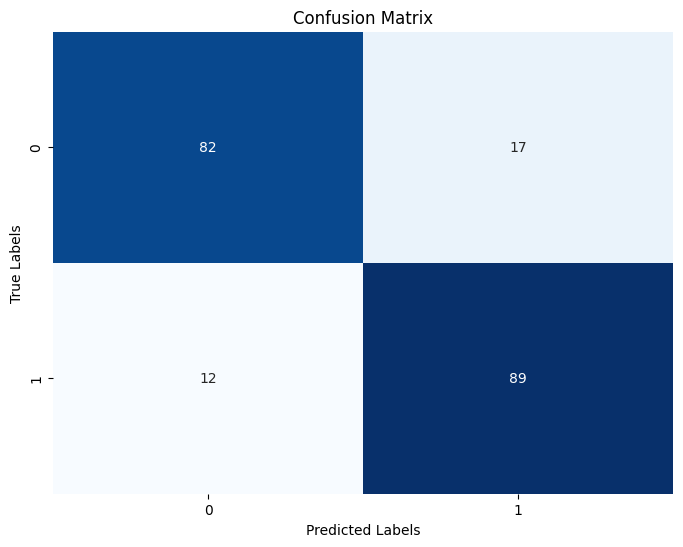

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
